In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('dataset_31_credit-g.csv')

In [3]:
df.shape

(1000, 21)

In [4]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [5]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [7]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
#df.duplicated().sum()

In [9]:
#df.isnull().sum()

In [10]:
target = df['class']
features = df.drop(['class'], axis = 1)

In [11]:
m = {'good': 1, 'bad': 0}
target = target.map(m)

In [12]:
target.value_counts()

1    700
0    300
Name: class, dtype: int64

## 1.1 Which features are cont and cat

In [13]:
numeric = features.dtypes != object

In [14]:
num_col = features.columns[numeric]
cat_col = features.columns[~numeric]
print('- Numeric features are ' + str(num_col.values.tolist()))
print('- Categorical features are ' + str(cat_col.values.tolist()))

- Numeric features are ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
- Categorical features are ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']


## 1.2 Visualize univariate distribution

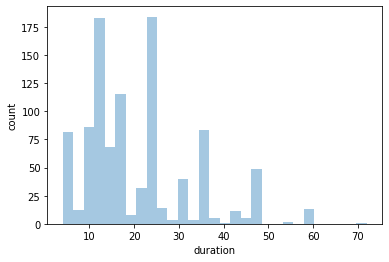

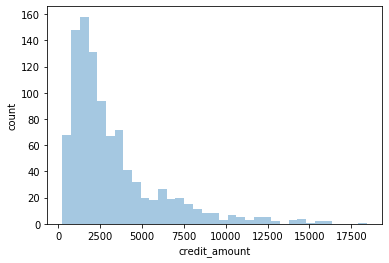

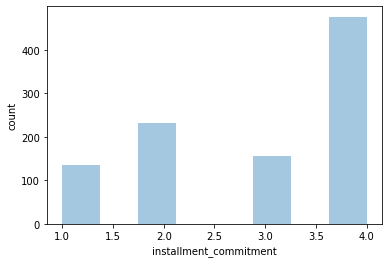

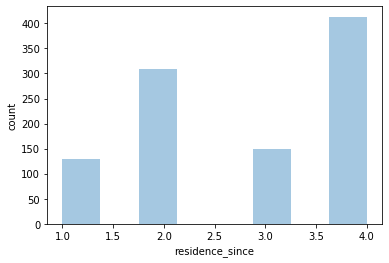

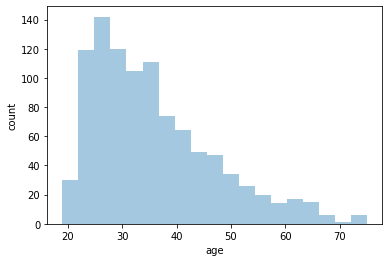

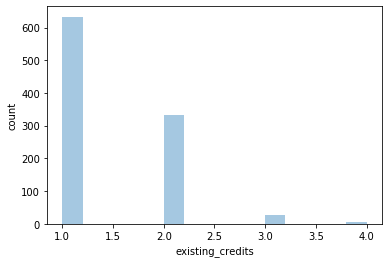

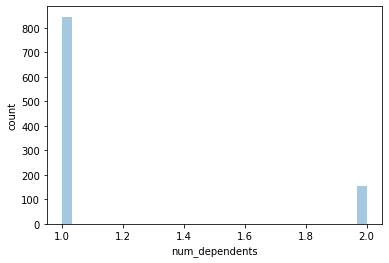

In [15]:
for col in features.columns[numeric]:
    sns.distplot(features[col], kde = False)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

## 1.3 Split and preprocess data without Pipeline

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    random_state = 1234, stratify = target)

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [18]:
# Scale numeric features with StandardScaler

sc = StandardScaler()
train_numcol = sc.fit_transform(X_train.loc[:,num_col])
test_numcol = sc.transform(X_test.loc[:,num_col])
print(train_numcol.shape, test_numcol.shape)


(750, 7) (250, 7)


In [19]:
# # Scale numeric features with MinMaxScaler

# sc = MinMaxScaler()
# train_numcol = sc.fit_transform(X_train.loc[:,num_col])
# test_numcol = sc.transform(X_test.loc[:,num_col])
# print(train_numcol.shape, test_numcol.shape)


In [20]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder()
train_catcol = ohe.fit_transform(X_train.loc[:, cat_col]).toarray()
test_catcol = ohe.transform(X_test.loc[:,cat_col]).toarray()
print(train_catcol.shape, test_catcol.shape)

(750, 54) (250, 54)


In [21]:
X_train = np.concatenate((train_numcol, train_catcol), axis = 1)
X_test = np.concatenate((test_numcol, test_catcol), axis = 1)
print(X_train.shape, X_test.shape)

(750, 61) (250, 61)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate


logreg = LogisticRegression()
# score = cross_val_score(logreg, X_train, y_train, cv = 10)
# print(score, '\n', score.mean()) # score on X_train, y_train
cv_res = cross_validate(logreg, X_train, y_train, cv = 10, return_train_score = True)
cv_df = pd.DataFrame(cv_res)
print(cv_df)
print('\n')
print('Score mean = {}, Score STD = {}'.format(cv_df.test_score.mean(), cv_df.test_score.std()))


#logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
#print(logreg.score(X_test, y_test))#

   fit_time  score_time  test_score  train_score
0  0.020937    0.000999    0.693333     0.800000
1  0.028922    0.001000    0.813333     0.785185
2  0.027925    0.000000    0.773333     0.786667
3  0.022937    0.000000    0.693333     0.797037
4  0.014959    0.000998    0.720000     0.797037
5  0.015957    0.000000    0.786667     0.783704
6  0.022938    0.000000    0.786667     0.798519
7  0.018949    0.000000    0.786667     0.785185
8  0.015958    0.000000    0.720000     0.798519
9  0.015958    0.000995    0.760000     0.804444


Score mean = 0.7533333333333333, Score STD = 0.043204937989385725


## 1.4 Using Column transformer + Pipeline + cross_validate
## With KNN / LogReg /  Linear SVC

In [23]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    random_state = 1234, stratify = target)

In [25]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
svc = LinearSVC(max_iter = 5000)
models = [knn, logreg, svc]

In [26]:
ct = make_column_transformer((StandardScaler(), numeric), (OneHotEncoder(), ~numeric))
pipe = make_pipeline(ct, knn)
cv_knn = cross_validate(pipe, X_train, y_train, cv = 10, return_train_score = True)
cv_knn_df = pd.DataFrame(cv_knn)
print(cv_knn_df)
print('\n')
print('Score mean = {}, Score STD = {}'.format(cv_knn_df.test_score.mean(), cv_knn_df.test_score.std()))

   fit_time  score_time  test_score  train_score
0  0.029953    0.012965    0.733333     0.807407
1  0.017953    0.012963    0.760000     0.808889
2  0.017951    0.012964    0.720000     0.811852
3  0.017950    0.015920    0.720000     0.807407
4  0.018946    0.012966    0.613333     0.831111
5  0.018948    0.012965    0.746667     0.797037
6  0.019946    0.013963    0.773333     0.802963
7  0.018949    0.011969    0.773333     0.801481
8  0.018945    0.011971    0.760000     0.808889
9  0.018951    0.011964    0.680000     0.805926


Score mean = 0.728, Score STD = 0.04957099908835089


In [27]:
ct = make_column_transformer((StandardScaler(), numeric), (OneHotEncoder(), ~numeric))
for model in models: 
    pipe = make_pipeline(ct, model)
    cv_model = cross_validate(pipe, X_train, y_train, cv = 10, return_train_score = True)
    cv_model_df = pd.DataFrame(cv_model)
    print(model)
    print('---')
    #print(cv_model_df)
    print('\n')
    print('Score mean = {}, Score STD = {}'.format(cv_model_df.test_score.mean(), cv_model_df.test_score.std()))
    print('-----')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
---


Score mean = 0.728, Score STD = 0.04957099908835089
-----
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
---


Score mean = 0.7533333333333333, Score STD = 0.043204937989385725
-----
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=5000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
---


Score mean = 0.748, Score STD = 0.047640630029730166
-----


## 1.5 Tune parameteres using GridSearchCV

In [28]:
#knn classifer

#Transform data, create pipeline
ct = make_column_transformer((StandardScaler(),numeric), (OneHotEncoder(),~numeric))
knn_pipe = make_pipeline(ct, KNeighborsClassifier())

#create grid search
param = {'kneighborsclassifier__n_neighbors': range(1,30)}
grid = GridSearchCV(knn_pipe, param, cv = 10, return_train_score = True)
grid.fit(X_train, y_train)

#Create grid search result dataframe
temp_df = pd.DataFrame(grid.cv_results_)
grid_df = temp_df[['param_kneighborsclassifier__n_neighbors','mean_test_score', 'std_test_score','mean_train_score',
       'std_train_score']]
grid_df = grid_df.rename(columns = {'param_kneighborsclassifier__n_neighbors':'k_neighbors'})
grid_df.head()


,k_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
0,1,0.701333,0.040966,1.000000,0.000000
1,2,0.665333,0.054471,0.879259,0.006009
2,3,0.744000,0.061333,0.845630,0.007606
3,4,0.722667,0.061910,0.836296,0.008229
4,5,0.728000,0.047027,0.808296,0.008618


In [29]:
# Wanted to try:
# from sklearn.model_selection import validation_curve, learning_curve


In [30]:
# find the best param and best score
print(grid.best_params_, grid.best_score_)

{'kneighborsclassifier__n_neighbors': 3} 0.744


In [31]:
# best_k = list(grid.best_params_.keys())[0]
# best_k = grid.best_params_[best_k]
# best_k

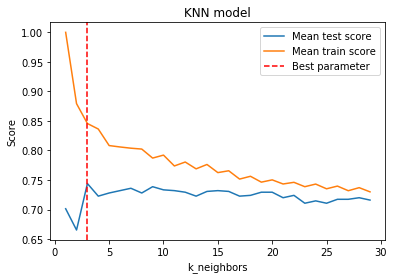



Final test score is  0.708


In [32]:
# Plot train score, test score and best param

plt.plot('k_neighbors', 'mean_test_score', data = grid_df, label = 'Mean test score')
plt.plot('k_neighbors', 'mean_train_score', data = grid_df, label = 'Mean train score')
plt.axvline(x = 3, linestyle = '--', color = 'r', label = 'Best parameter')
plt.legend()
plt.xlabel('k_neighbors')
plt.ylabel('Score')
plt.title('KNN model')
plt.show()
print('\n')
#score test set with best param
test_score = grid.score(X_test, y_test)
print('Final test score is ', test_score)

In [33]:
# Logreg

# Transform column, make pipeline, create and fit grid
ct =make_column_transformer((StandardScaler(), numeric), (OneHotEncoder(), ~numeric))
logreg_pipe = make_pipeline(ct, LogisticRegression(max_iter = 1000))
param = {'logisticregression__C': np.logspace(-1.5, 0.01, 20)}
grid = GridSearchCV(logreg_pipe,param_grid = param, cv = 10, return_train_score = True)
grid.fit(X_train,y_train)

#Create grid search result dataframe
temp_df = pd.DataFrame(grid.cv_results_)
grid_df = temp_df[['param_logisticregression__C','mean_test_score', 'std_test_score','mean_train_score',
       'std_train_score']]
grid_df = grid_df.rename(columns = {'param_logisticregression__C':'C'})
grid_df.head()

# print(grid.score(X_test, y_test))

,C,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.0316228,0.741333,0.032221,0.766074,0.006540
1,0.0379729,0.742667,0.032687,0.772444,0.005783
2,0.0455982,0.744000,0.033625,0.774815,0.006215
3,0.0547547,0.744000,0.032551,0.778370,0.007413
4,0.0657498,0.746667,0.027968,0.780000,0.005972


In [34]:
print(grid.best_params_)
print(grid.best_score_)

{'logisticregression__C': 0.13670659732155513}
0.7586666666666666


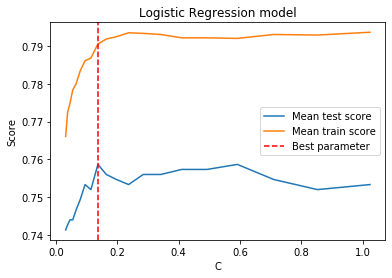



Final test score is  0.78


In [35]:
# Plot train score, test score and best param

plt.plot('C', 'mean_test_score', data = grid_df, label = 'Mean test score')
plt.plot('C', 'mean_train_score', data = grid_df, label = 'Mean train score')
plt.axvline(x = 0.136, linestyle = '--', color = 'r', label = 'Best parameter')
plt.legend()
plt.xlabel('C')
plt.ylabel('Score')
plt.title('Logistic Regression model')
plt.show()
print('\n')

#score test set with best param
test_score = grid.score(X_test, y_test)
print('Final test score is ', test_score)

In [36]:
#Linear SVC

#Transform column, create pipe, create grid and fit grid
ct = make_column_transformer((StandardScaler(), numeric), (OneHotEncoder(), ~numeric))
svc_pipe = make_pipeline(ct, LinearSVC(max_iter = 5000))
param = {'linearsvc__C': np.logspace(-2.5, -1, 20)}
grid = GridSearchCV(svc_pipe, param_grid = param, cv =10, return_train_score = True)
grid.fit(X_train, y_train)


#Create grid search result dataframe
temp_df = pd.DataFrame(grid.cv_results_)
grid_df = temp_df[['param_linearsvc__C','mean_test_score', 'std_test_score','mean_train_score',
       'std_train_score']]
grid_df = grid_df.rename(columns = {'param_linearsvc__C':'C'})
grid_df.head()



,C,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.00316228,0.737333,0.026026,0.761481,0.008195
1,0.00379269,0.737333,0.031581,0.766519,0.008038
2,0.00454878,0.742667,0.036782,0.771704,0.005108
3,0.00545559,0.742667,0.032687,0.774815,0.006980
4,0.00654319,0.749333,0.035678,0.778667,0.007789


In [37]:
print(grid.best_params_)
print(grid.best_score_)

{'linearsvc__C': 0.01947483039908756}
0.7573333333333333


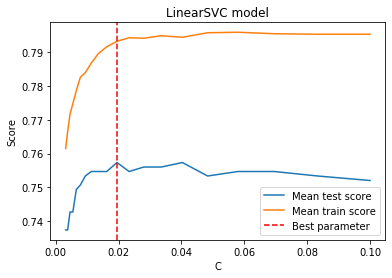



Final test score is  0.784


In [38]:
# Plot train score, test score and best param

plt.plot('C', 'mean_test_score', data = grid_df, label = 'Mean test score')
plt.plot('C', 'mean_train_score', data = grid_df, label = 'Mean train score')
plt.axvline(x = 0.0194, linestyle = '--', color = 'r', label = 'Best parameter')
# plt.fill_between('C', grid_df['mean_train_score']- grid_df['std_train_score'], grid_df['mean_train_score']+ grid_df['std_train_score'], data = grid_df, color="gray")
# plt.fill_between('C', grid_df['mean_test_score']- grid_df['std_test_score'], grid_df['mean_test_score']+ grid_df['std_test_score'], color="gainsboro")
plt.legend()
plt.xlabel('C')
plt.ylabel('Score')
plt.title('LinearSVC model')
plt.show()
print('\n')

#score test set with best param
test_score = grid.score(X_test, y_test)
print('Final test score is ', test_score)

## 1.6 CV strategy:  Stratified KFold --> KFold with shuffling

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 1234, stratify = target)

In [40]:
# KNN with KFold shuffling
from sklearn.model_selection import KFold

ct = make_column_transformer((StandardScaler(), numeric), (OneHotEncoder(), ~numeric))
kfold = KFold(n_splits = 10, shuffle = True, random_state = 23)
knn_pipe = make_pipeline(ct, KNeighborsClassifier())
param = {'kneighborsclassifier__n_neighbors': range(1,30)}

grid = GridSearchCV(knn_pipe, param_grid = param, cv = kfold, return_train_score = True)
grid.fit(X_train, y_train)
temp_df = pd.DataFrame(grid.cv_results_)
grid_df = temp_df[['param_kneighborsclassifier__n_neighbors','mean_test_score', 'std_test_score',\
                  'mean_train_score','std_train_score']]

grid_df = grid_df.rename(columns = {'param_kneighborsclassifier__n_neighbors': 'n_neighbors'})
print(grid_df.head())


  n_neighbors  mean_test_score  std_test_score  mean_train_score  \
0           1         0.704000        0.044542          1.000000   
1           2         0.680000        0.049531          0.879407   
2           3         0.741333        0.040530          0.847704   
3           4         0.718667        0.040639          0.835407   
4           5         0.741333        0.038736          0.811111   

   std_train_score  
0         0.000000  
1         0.004647  
2         0.010617  
3         0.006540  
4         0.006600  


In [41]:
print(grid.best_params_)
print(grid.best_score_)

{'kneighborsclassifier__n_neighbors': 6}
0.7493333333333332


In [42]:
#Function to fit model with kfold_shuffling
def fit_with_kfold_shuffling(model, param, kstate = 23):
    ct = make_column_transformer((StandardScaler(), numeric), (OneHotEncoder(), ~numeric))
    kfold = KFold(n_splits = 10, random_state = kstate, shuffle = True)
    pipe = make_pipeline(ct, model)
    grid = GridSearchCV(pipe, cv = kfold, param_grid = param, return_train_score = True)
    grid.fit(X_train, y_train)
    return(grid.best_params_, grid.best_score_)

In [43]:
knn_param, knn_score = fit_with_kfold_shuffling(KNeighborsClassifier(),\
                                               param = {'kneighborsclassifier__n_neighbors': range(1,30)},\
                                               kstate = 23)
print(knn_param, knn_score)

{'kneighborsclassifier__n_neighbors': 6} 0.7493333333333332


In [44]:
knn_param, knn_score = fit_with_kfold_shuffling(KNeighborsClassifier(),\
                                               param = {'kneighborsclassifier__n_neighbors': range(1,30)},\
                                               kstate = 1234)
print(knn_param, knn_score)

{'kneighborsclassifier__n_neighbors': 12} 0.7426666666666667


In [45]:
logreg_param, logreg_score = fit_with_kfold_shuffling(LogisticRegression(max_iter = 1000),\
                                               param = {'logisticregression__C': np.logspace(-2.5,-1,20)},\
                                               kstate = 23)
print(logreg_param, logreg_score)

{'logisticregression__C': 0.08337822234717891} 0.7546666666666666


In [46]:
logreg_param, logreg_score = fit_with_kfold_shuffling(LogisticRegression(max_iter = 1000),\
                                               param = {'logisticregression__C': np.logspace(-2.5,-1,20)},\
                                               kstate = 1234)
print(logreg_param, logreg_score)

{'logisticregression__C': 0.1} 0.756


In [47]:
svc_param, svc_score = fit_with_kfold_shuffling(LinearSVC(max_iter = 5000),\
                                               param = {'linearsvc__C': np.logspace(-2.5,-1,20)},\
                                               kstate = 23)
print(svc_param, svc_score)

{'linearsvc__C': 0.00941204967268067} 0.756


In [48]:
svc_param, svc_score = fit_with_kfold_shuffling(LinearSVC(max_iter = 5000),\
                                               param = {'linearsvc__C': np.logspace(-2.5,-1,20)},\
                                               kstate = 1234)
print(svc_param, svc_score)

{'linearsvc__C': 0.011288378916846888} 0.756


## 1.7 Visualize most important coefficient

In [49]:
# import numpy as np    
# from sklearn.linear_model import LogisticRegression

# x1 = np.random.randn(100)
# x2 = 4*np.random.randn(100)
# x3 = 0.5*np.random.randn(100)
# y = (3 + x1 + x2 + x3 + 0.2*np.random.randn()) > 0
# X = np.column_stack([x1, x2, x3])

# m = LogisticRegression()
# m.fit(X, y)

# # The estimated coefficients will all be around 1:
# print(m.coef_)

# # Those values, however, will show that the second parameter
# # is more influential
# print(np.std(X, 0)*m.coef_)

In [50]:
# m.fit(X / np.std(X, 0), y)
# print(m.coef_)

In [51]:
# draw graph
X_train, X_test, y_train, y_test = train_test_split(features, target, \
                                                    random_state = 1234, stratify = target)

In [52]:
# for logistic regression with C = 0.1
ct = make_column_transformer((StandardScaler(), numeric), (OneHotEncoder(), ~numeric))
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
final_logreg = LogisticRegression(C = 0.1)
final_logreg.fit(X_train, y_train)
print('Coefficient: ', final_logreg.coef_)
print('Intercept: ', final_logreg.intercept_)

Coefficient:  [[-0.26350694 -0.35318756 -0.27895639  0.02290242  0.0484705  -0.05449633
  -0.05294354 -0.19407415 -0.6109968   0.08869372  0.7163924  -0.3053234
   0.57354682  0.08663058  0.01323544 -0.36807426 -0.07295928 -0.46781162
   0.37482154  0.04568627 -0.30946462  0.04269224  0.19166787  0.19159419
  -0.07845206  0.08224066 -0.12082138  0.01194768 -0.32566085  0.14622402
   0.2883257  -0.01717801  0.33925924 -0.23322628  0.11177813 -0.20061789
  -0.11866574 -0.21035028 -0.03011398  0.35914517 -0.20047901  0.33293592
  -0.13244173 -0.09256352 -0.16377923  0.27635476 -0.01999683 -0.23351859
   0.33841198 -0.10487821  0.02084896  0.19847288 -0.21930666 -0.06446078
   0.05258969 -0.00128812  0.01317439 -0.12642496  0.12644013  0.22415632
  -0.22414115]]
Intercept:  [0.82412748]


In [61]:
# Select important index with LassoCV

from sklearn.linear_model import LassoCV

las = LassoCV()
las.fit(X_train, y_train)

# all coef
ser = pd.Series(las.coef_)

Best alpha using built-in LassoCV: 0.003271
Best score using built-in LassoCV: 0.280368


In [83]:
# take absolute value and select index of the nlargest coef
idx = ser.abs().nlargest(n = 20).index
print(idx)

Int64Index([15, 8, 10, 41, 20, 17, 12, 11, 48, 39, 1, 32, 45, 18, 28, 30, 2, 0,
            33, 52],
           dtype='int64')


In [92]:
important_coef =  final_logreg.coef_[0][idx]

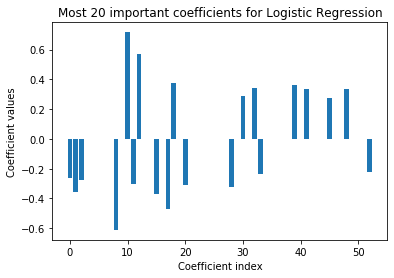

In [97]:
plt.bar(idx, important_coef)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient values')
plt.title('Most 20 important coefficients for Logistic Regression')
plt.show()